In [5]:
import torchvision
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
class_names = ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']

model = torchvision.models.efficientnet_b2(weights=None).to(device)
model.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True),
    nn.Linear(in_features=1408, out_features=len(class_names), bias=True)
)
model.to(device)    

state_dict = torch.load("animals_model_weights.pth", map_location=device)
model.load_state_dict(state_dict)
model.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [6]:
from pathlib import Path
image_folder = Path("images")
image_file_name = "baby-deer.jpg"
custom_image_path = image_folder / image_file_name
custom_image_path

WindowsPath('images/baby-deer.jpg')

In [7]:
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
custom_image_uint8

tensor([[[ 30,  30,  31,  ..., 140, 143, 144],
         [ 31,  31,  32,  ..., 140, 143, 143],
         [ 32,  33,  33,  ..., 140, 141, 141],
         ...,
         [ 22,  24,  26,  ..., 178, 178, 178],
         [ 27,  27,  28,  ..., 176, 176, 176],
         [ 28,  28,  30,  ..., 176, 176, 176]],

        [[ 91,  91,  92,  ..., 111, 111, 112],
         [ 92,  92,  93,  ..., 111, 111, 111],
         [ 93,  94,  94,  ..., 111, 112, 112],
         ...,
         [ 63,  65,  67,  ..., 243, 243, 243],
         [ 70,  70,  71,  ..., 243, 243, 243],
         [ 71,  71,  73,  ..., 243, 243, 243]],

        [[ 58,  58,  61,  ...,  97,  98,  99],
         [ 59,  59,  62,  ...,  97,  98,  98],
         [ 60,  61,  61,  ...,  97,  98,  98],
         ...,
         [ 19,  21,  23,  ..., 149, 149, 149],
         [ 27,  27,  28,  ..., 148, 148, 148],
         [ 28,  28,  30,  ..., 148, 148, 148]]], dtype=torch.uint8)

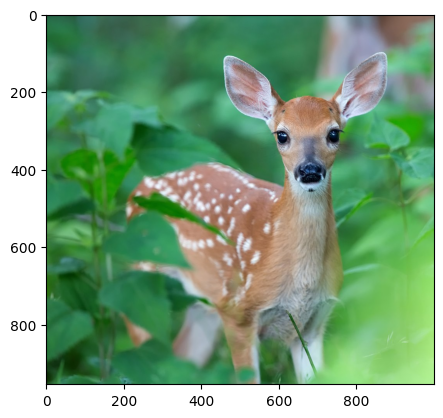

In [8]:
from matplotlib import pyplot as plt
plt.imshow(custom_image_uint8.permute(1, 2, 0))

In [9]:
custom_image_float32 = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.
custom_image_float32.shape

torch.Size([3, 954, 1000])

In [10]:
from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(288, 288))
])

custom_image_transformed = custom_image_transform(custom_image_float32)
custom_image_transformed.shape

torch.Size([3, 288, 288])

In [11]:
with torch.inference_mode():
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0))
custom_image_pred

tensor([[ 0.5502, -6.9697, -3.3558, -7.1770, -5.8747, -6.2297, -6.9059, -4.4786,
         -5.5608, -6.6800, -7.4270, -8.3782, -7.0964, -5.5945, -1.4200, -7.3734,
         -6.8483,  3.5438, -5.6303, -7.6232, -4.7702, -6.1848, -3.1723, -8.5347,
         -7.0045, -6.8096, -7.6591, -2.5644, -3.2533, -5.7262, -6.3572, -7.7826,
         -7.9404, -5.5205, -3.2139, -5.8435, -6.2561, -8.0959, -4.3610, -4.5959,
         -2.2759, -5.7403,  1.5553, -5.7163, -7.5210, -7.0634, -7.0619, -5.6968,
         -7.4789, -5.8796, -4.1551, -2.8616, -4.2051, -1.1031, -6.8342, -6.7457,
         -3.8905, -7.4795, -6.5107, -9.4847, -3.3619, -6.5706, -7.4730, -4.7405,
         -6.4255, -8.9060, -6.0003, -7.8555, -4.7622, -3.2633, -6.5880, -4.7832,
         -5.2517, -4.6266, -8.3759, -4.6216, -5.3162, -6.1433, -4.3243, -1.9097,
         -7.1864, -6.9316, -7.1236, -6.4865, -5.8743, -6.9892, -7.3000, -8.1756,
         -5.6987, -5.5826]])

In [12]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[4.0783e-02, 2.2112e-05, 8.2054e-04, 1.7972e-05, 6.6098e-05, 4.6343e-05,
         2.3569e-05, 2.6698e-04, 9.0466e-05, 2.9542e-05, 1.3997e-05, 5.4067e-06,
         1.9480e-05, 8.7472e-05, 5.6865e-03, 1.4768e-05, 2.4965e-05, 8.1395e-01,
         8.4397e-05, 1.1502e-05, 1.9946e-04, 4.8474e-05, 9.8585e-04, 4.6232e-06,
         2.1356e-05, 2.5952e-05, 1.1097e-05, 1.8106e-03, 9.0910e-04, 7.6675e-05,
         4.0799e-05, 9.8078e-06, 8.3759e-06, 9.4188e-05, 9.4569e-04, 6.8192e-05,
         4.5136e-05, 7.1703e-06, 3.0030e-04, 2.3743e-04, 2.4160e-03, 7.5605e-05,
         1.1142e-01, 7.7444e-05, 1.2741e-05, 2.0135e-05, 2.0165e-05, 7.8963e-05,
         1.3289e-05, 6.5770e-05, 3.6896e-04, 1.3451e-03, 3.5098e-04, 7.8061e-03,
         2.5321e-05, 2.7664e-05, 4.8071e-04, 1.3281e-05, 3.4993e-05, 1.7880e-06,
         8.1556e-04, 3.2957e-05, 1.3368e-05, 2.0548e-04, 3.8102e-05, 3.1892e-06,
         5.8295e-05, 9.1189e-06, 2.0107e-04, 9.0010e-04, 3.2388e-05, 1.9689e-04,
         1.2324e-04, 2.3026e

In [13]:
custom_image_pred_index = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_index

tensor([17])

In [14]:
custom_image_prediction = class_names[custom_image_pred_index]
custom_image_prediction

'deer'

In [15]:
def predict_image(image_path):

    import torchvision
    from torchvision import transforms
    
    class_names = ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']
    image_float32 = torchvision.io.read_image(str(image_path)).type(torch.float32) / 255.

    image_transform = transforms.Compose([
        transforms.Resize(size=(288, 288))
    ])
    image_transformed = image_transform(image_float32)

    with torch.inference_mode():
        image_pred = model(image_transformed.unsqueeze(dim=0))
    
    image_pred_probs = torch.softmax(image_pred, dim=1)
    image_pred_index = torch.argmax(image_pred_probs, dim=1)
    image_prediction = class_names[image_pred_index]

    return image_prediction

In [16]:
prediction = predict_image(custom_image_path)
prediction, type(prediction)

('deer', str)